<a href="https://colab.research.google.com/github/kmkarakaya/Deep-Learning-Tutorials/blob/master/An_Introduction_to_Controllable_Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to Controllable Text Generation

**Author:** [Murat Karakaya](https://www.linkedin.com/in/muratkarakaya/)<br>
**Date created:** 2021/04/21<br>
**Last modified:** 2021/04/21<br>
**Description:** This is an introduction ***tutorial*** on ***Controllable Text Generation*** which is the first part of the "**Controllable Text Generation with Transformers (GPT3)**" series<br>
**Accessible on:**
* [YouTube in English](https://youtube.com/playlist?list=PLQflnv_s49v8Eo2idw9Ju5Qq3JTEF-OFW)
* [YouTube in Turkish](https://youtube.com/playlist?list=PLQflnv_s49v8-xeTLx1QmuE-YkRB4bToF)
* [Medium](https://medium.com/deep-learning-with-keras/controllable-text-generation-in-deep-learning-with-transformers-gpt3-using-tensorflow-keras-3d9e6bbe243b)
* [Github pages](https://kmkarakaya.github.io/Deep-Learning-Tutorials/)
* [Github Repo](https://github.com/kmkarakaya/Deep-Learning-Tutorials)
* [Google Colab](https://colab.research.google.com/drive/1JGgU3Zcpe7sitdPuI3WvCMp1kDna2UY5?usp=sharing)


# Controllable Text Generation with Transformers (GPT3) tutorial series

In this series, we will focus on developing TensorFlow (TF) / Keras implementation of Controllable Text Generation with Transformers  (GPT3) from scratch.

**Part A:** An Introduction to Controllable Text Generation

**Part B:** Tensorflow Data Pipeline for Word Level Controllable Text Generation

**Part C**: A Miniature Transformer (GPT3) Model for Word Level Controllable Text Generation

[You can access all the parts from this link](https://medium.com/deep-learning-with-keras/controllable-text-generation-in-deep-learning-with-transformers-gpt3-using-tensorflow-keras-3d9e6bbe243b).

Before getting started, I assume that you have already:

* completed the tutorial series "[Text Generation methods in Deep Learning with Tensorflow (TF) & Keras](https://medium.com/deep-learning-with-keras/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1)" 
* completed the tutorial series "[Sequence-to-Sequence Learning](https://medium.com/deep-learning-with-keras/part-a-introduction-to-seq2seq-learning-a-sample-solution-with-mlp-network-95dc0bcb9c83)"
*  reviewed the previous parts in this series

Please ensure that you have completed above trainings to easily follow the below tutorial.

#References


- A. Radford, Karthik Narasimhan, [**Improving Language Understanding by Generative Pre-Training (GPT)**](https://www.semanticscholar.org/paper/Improving-Language-Understanding-by-Generative-Radford/cd18800a0fe0b668a1cc19f2ec95b5003d0a5035)
- A. Radford, Jeffrey Wu, R. Child, David Luan, Dario Amodei, Ilya Sutskever, [**Language Models are Unsupervised Multitask Learners (GPT-2)**](https://www.semanticscholar.org/paper/Language-Models-are-Unsupervised-Multitask-Learners-Radford-Wu/9405cc0d6169988371b2755e573cc28650d14dfe)
- Tom B. Brown, et.al., [**Language Models are Few-Shot Learners (GPT-3)**](https://arxiv.org/abs/2005.14165)

- Jay Alammar, [**The Illustrated GPT-2** (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)

- Murat Karakaya, **Encoder-Decoder Structure in Seq2Seq Learning** Tutorials: on YouTube in [English](https://youtube.com/playlist?list=PLQflnv_s49v-4aH-xFcTykTpcyWSY4Tww) or [Turkish](https://youtube.com/playlist?list=PLQflnv_s49v97hDXtCo4mgje_SEiJ0_hH). You can also access these tutorials [on Medium here](https://medium.com/deep-learning-with-keras/sequence-to-sequence-learning-c8be6cd34848). 

- Murat Karakaya, **Text Generation with different Deep Learning Models** Tutorials: on YouTube in [English](https://youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu) or [Turkish](https://youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3). You can also access these tutorials [on Medium here](https://medium.com/deep-learning-with-keras/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1). 
* Auto-regression


# 1. What is text generation in Deep Learning?

In the simplest form, you train a Deep Learning (DL) model to generate random but hopefully meaningful text.

Text generation is a subfield of **natural language processing (NLP)**. It leverages knowledge in computational linguistics and artificial intelligence to ***automatically generate natural language texts***, which can ***satisfy certain communicative requirements***.

You can visit [Write With Transformer](https://transformer.huggingface.co/) or [Talk to Transformer](https://app.inferkit.com/demo) websites to interact with several demos.

Here is [a quick demo](https://youtu.be/mLwdx5IxjwU):



In [8]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/S_f2qV2_U00?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

  [![Everything Is AWESOME](http://i.imgur.com/Ot5DWAW.png)](https://youtu.be/StTqXEQ2l-Y?t=35s "Everything Is AWESOME")

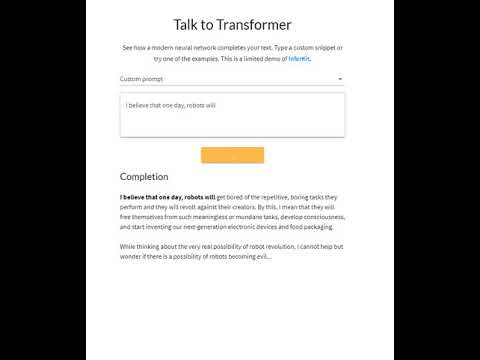

In [ ]:
#@title Text Generation Demo 
from IPython.display import Audio,Image, YouTubeVideo
id='mLwdx5IxjwU'
YouTubeVideo(id=id,width=500,height=500)

# 2. What is a prompt?
Prompt is the initial text input to the trained model so that it can complete the prompt by generating suitable text.

We expect that the trained model is capable of taking care of the prompt properly to generate sensible text.

In the above demo, the prompt we provided is "***I believe that one day, robots will***" and the trained model generates the following text:

<img src="https://raw.githubusercontent.com/kmkarakaya/Deep-Learning-Tutorials/master/images/ControllableTextGen_Prompt.png" width="500">

In [7]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/kmkarakaya/Deep-Learning-Tutorials/master/images/ControllableTextGen_Prompt.png', width=200)

# 3. What is a Language Model?

In the current context, the model trained to generate text is mostly called a Language Model (LM).

In a broader context, a ***statistical language model*** is a probability distribution over sequences of tokens (i.e., words or characters). 

Given such a sequence (***assume a statement***), say of length m, it assigns a probability $P(w_{1}$,$...$, $w_{m})$ to the whole sequence.





# 4. How it works?
In general: 
* We first **train**  a ***Language Model*** (LM) with  a ***corpus***. LM **learns** the ***conditional probability distribution*** of the next token for a given token sequence from the corpus.


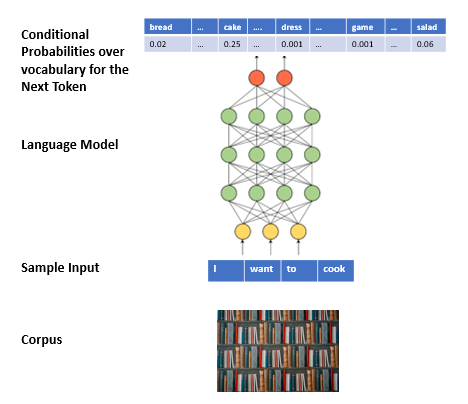

# 5. What is a Corpus?

A corpus (plural ***corpora***) or text corpus is a **language resource** consisting of a ***large and structured set of texts***. 

For example, [Large Movie Review corpus](https://ai.stanford.edu/~amaas/data/sentiment/index.html) consists of 25,000 highly polar movie reviews for training, and 25,000 for testing to train a Language Model for sentiment analysis. 

In the below  [demo](https://youtu.be/Vz0wV9s9sis), you are seeing a model trained with a Movie Reviews dataset generates "positive" or "negative" reviews.

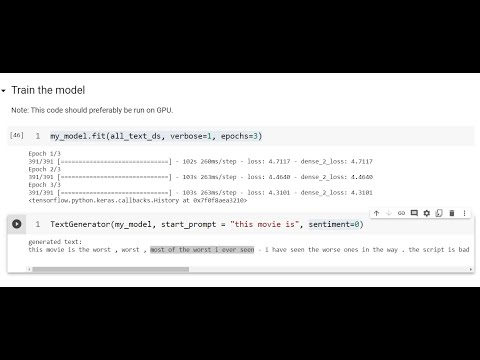

In [ ]:
#@title Controllable Text Generation Demo 
from IPython.display import Audio,Image, YouTubeVideo
id='Vz0wV9s9sis'
YouTubeVideo(id=id,width=900,height=400)

# 4. What is controllable text generation in Deep Learning?

# 5. What are the applications of controllable text generation?

# 6. How can we control text generation?

# 7. What is next?

# . A VERY QUICK INTRO FOR TRANSFORMERS



## GENERIC STRUCTURE

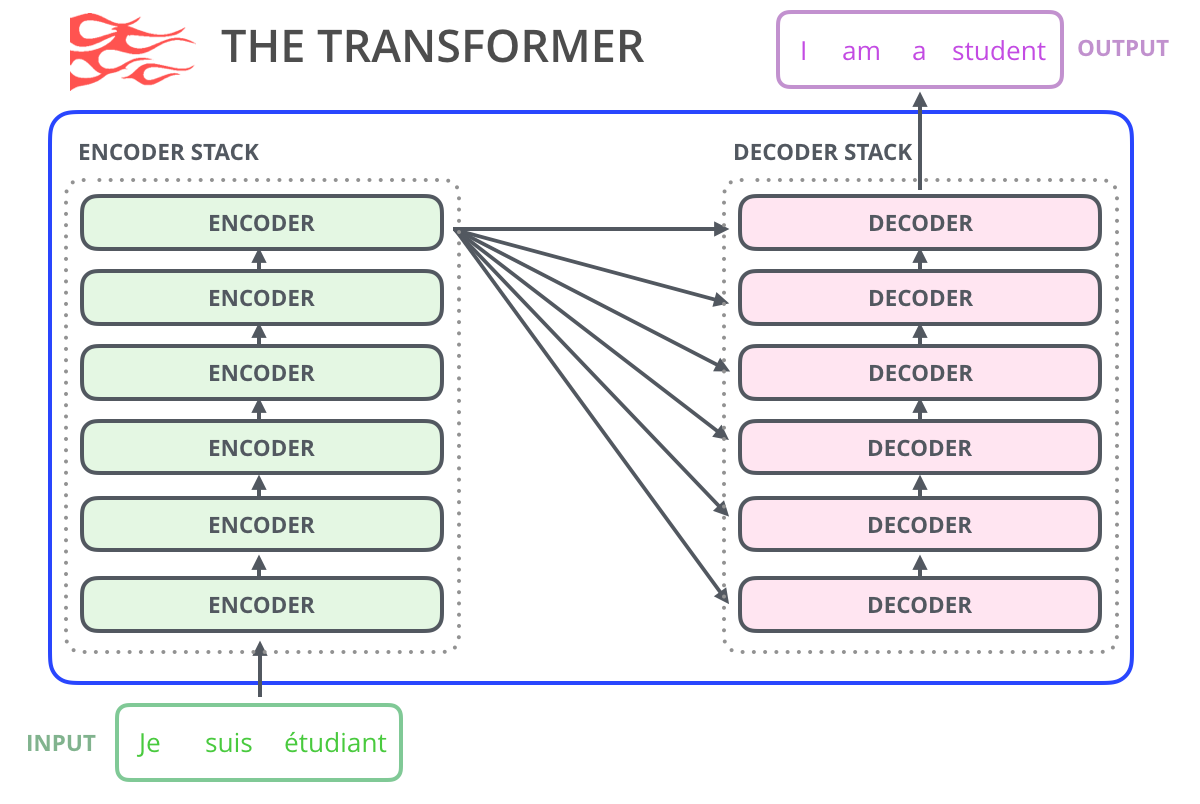

Image is taken from the blog [Jay Alammar, The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)

## USE GENERIC TRANSFORMER'S STRUCTURE AS A LANGUAGE MODEL

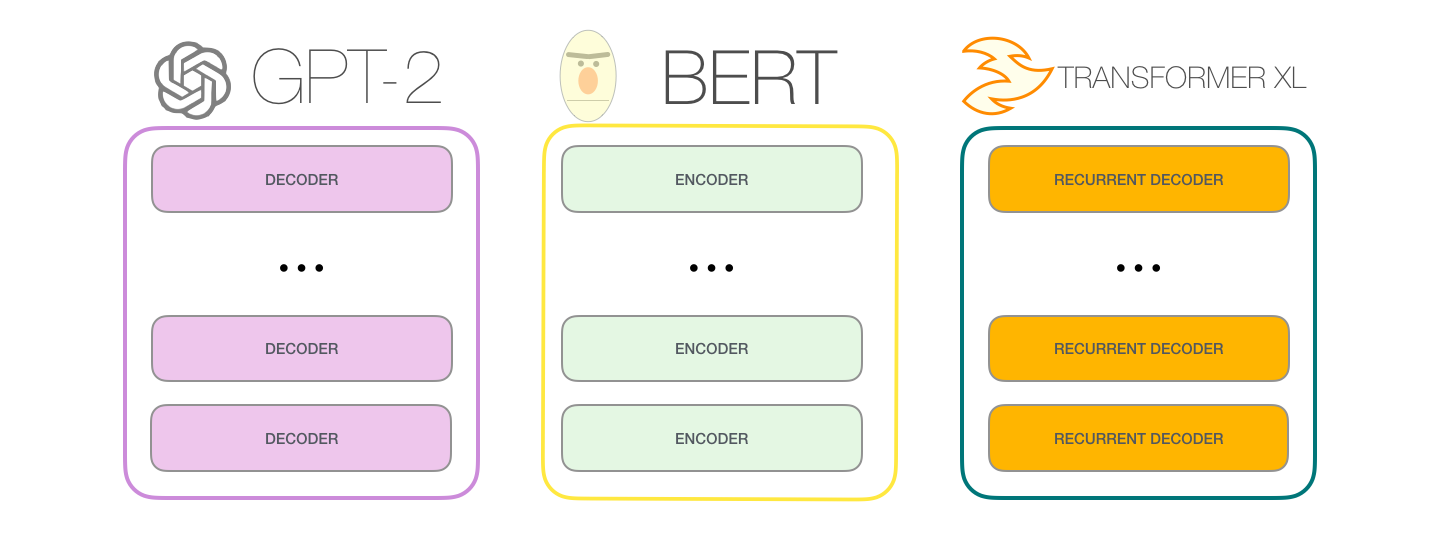

Image is taken from the blog [Jay Alammar, The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)

## Setup

Dependencies

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import numpy as np
import os
import re
import string
import random


## Implement a Transformer block as a layer

In [ ]:
def causal_attention_mask(batch_size, n_dest, n_src, dtype):
    """
    Mask the upper half of the dot product matrix in self attention.
    This prevents flow of information from future tokens to current token.
    1's in the lower triangle, counting from the lower right corner.
    """
    i = tf.range(n_dest)[:, None]
    j = tf.range(n_src)
    m = i >= j - n_src + n_dest
    mask = tf.cast(m, dtype)
    mask = tf.reshape(mask, [1, n_dest, n_src])
    mult = tf.concat(
        [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], 0
    )
    return tf.tile(mask, mult)


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads, embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        causal_mask = causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)
        attention_output = self.att(inputs, inputs, attention_mask=causal_mask)
        attention_output = self.dropout1(attention_output)
        out1 = self.layernorm1(inputs + attention_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)


## Implement an embedding layer

Create two seperate embedding layers: one for tokens and one for token index
(positions).

In [ ]:

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


In [ ]:
class TokenPositionAndSentimentEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, sentiment_size, embed_dim):
        super(TokenPositionAndSentimentEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.sentiment_emb = layers.Embedding(input_dim=sentiment_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x, s):
        maxlen = tf.shape(x)[-1]
        sentiment = s
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        sentiments= self.sentiment_emb(sentiment)
        return x + positions + sentiments

## Implement the miniature GPT model

In [ ]:
vocab_size = 20000  # Only consider the top 20k words
sentiment_size = 2  # Positive Negative movie reviews
maxlen = 80  # Max sequence size

embed_dim = 256  # Embedding size for each token
num_heads = 2  # Number of attention heads
feed_forward_dim = 256  # Hidden layer size in feed forward network inside transformer


def create_model():
    inputs_tokens = layers.Input(shape=(maxlen,), dtype=tf.int32)
    inputs_sentiments = layers.Input(shape=(1,), dtype=tf.int32)
    #embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
    embedding_layer = TokenPositionAndSentimentEmbedding(maxlen, vocab_size, sentiment_size, embed_dim)
    x = embedding_layer(inputs_tokens,inputs_sentiments)
    transformer_block = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    x = transformer_block(x)
    outputs = layers.Dense(vocab_size)(x)
    model = keras.Model(inputs=[inputs_tokens,inputs_sentiments], outputs=[outputs, x])
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(
        "adam", loss=[loss_fn, None],
    )  # No loss and optimization based on word embeddings from transformer block
    return model
my_model=create_model()

In [ ]:
my_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_position_and_sentiment_em (None, 80, 256)      5140992     input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
transformer_block_1 (Transforme (None, 80, 256)      658688      token_position_and_sentimen

# 2. TF DATA PIPELINE


Prepare the data for word-level language modelling



## 2.A. Download the IMDB dataset and combine training and validation sets for a text generation task.

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  31.9M      0  0:00:02  0:00:02 --:--:-- 31.9M


Notice that positive and negative reviews are splitted in test and train folders:

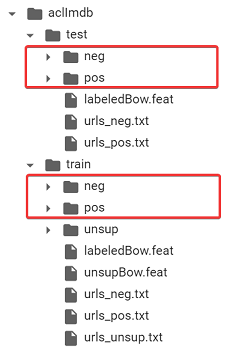

## 2.B The TF data pipeline overview

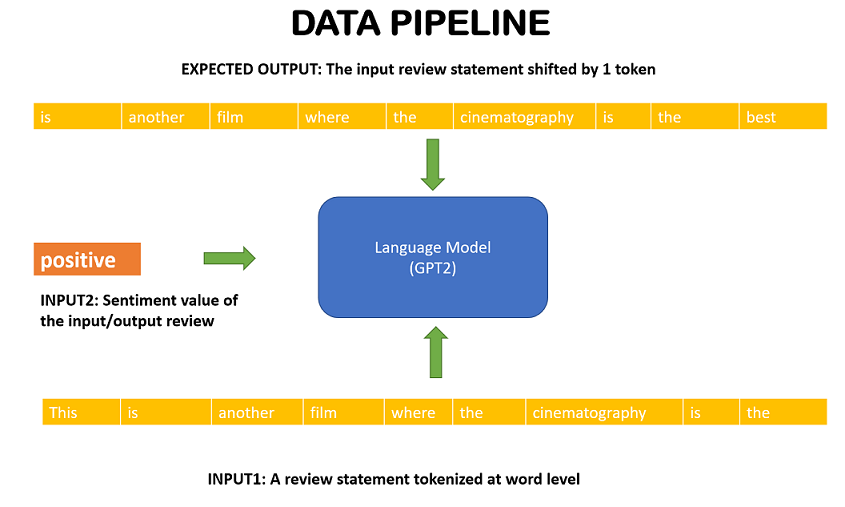

## 2.C Put all Negative Reviews and Positive Reviews in 2 distinct datasets, and concatenate them as a complete review dataset: 

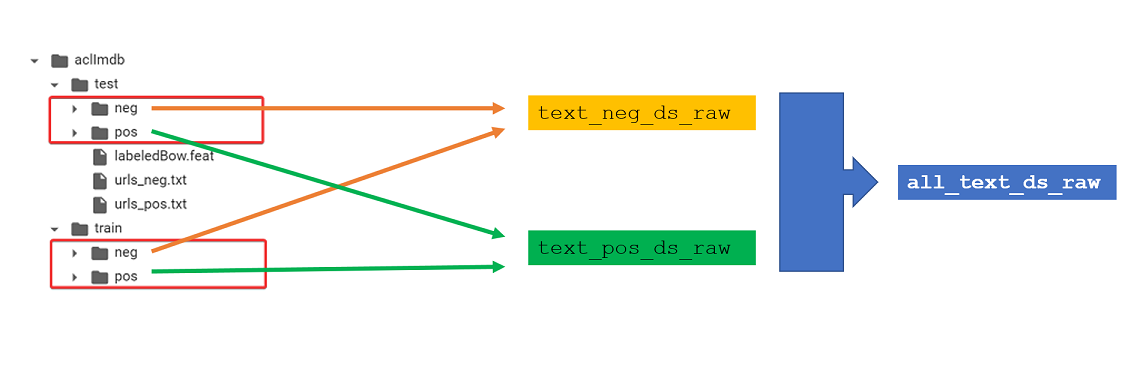

In [ ]:
batch_size = 128

# The dataset contains each review in a separate text file
# The text files are present in four different folders
# Create a list all files
filenames_positive = []
filenames_negative = []
directories_positive = [
    "aclImdb/train/pos",
    "aclImdb/test/pos",
]

directories_negative = [
    "aclImdb/train/neg",
    "aclImdb/test/neg",
]
for dir in directories_positive:
    for f in os.listdir(dir):
        filenames_positive.append(os.path.join(dir, f))
for dir in directories_negative:
    for f in os.listdir(dir):
        filenames_negative.append(os.path.join(dir, f))
print(f"Total number of positive review files: {len(filenames_positive)}")
print(f"Total number of negative review files: {len(filenames_negative)}")

all_text_ds_raw = tf.data.TextLineDataset([filenames_positive,filenames_negative])
all_text_ds_raw = all_text_ds_raw.batch(batch_size)

text_pos_ds_raw = tf.data.TextLineDataset(filenames_positive)
text_neg_ds_raw = tf.data.TextLineDataset(filenames_negative)


Total number of positive review files: 25000
Total number of negative review files: 25000


## 2.D Prepare the Keras TextVectorization Layer to vectorize the whole reviews `all_text_ds_raw` 

For more information see the [Keras official documentation here.](https://keras.io/guides/preprocessing_layers/)

Here:
* we **preprocess** the review texts by removing html line-break tags and handling punctuations
* we **split** and **truncate** the text into a `maxlen` number of tokens
* we **convert** words to integer number representations
* we **build** a dictionary for the most frequent `vocab_size` words

For above **transformations**, we use  `all_text_ds_raw` to set up the Keras `vectorize_layer`.







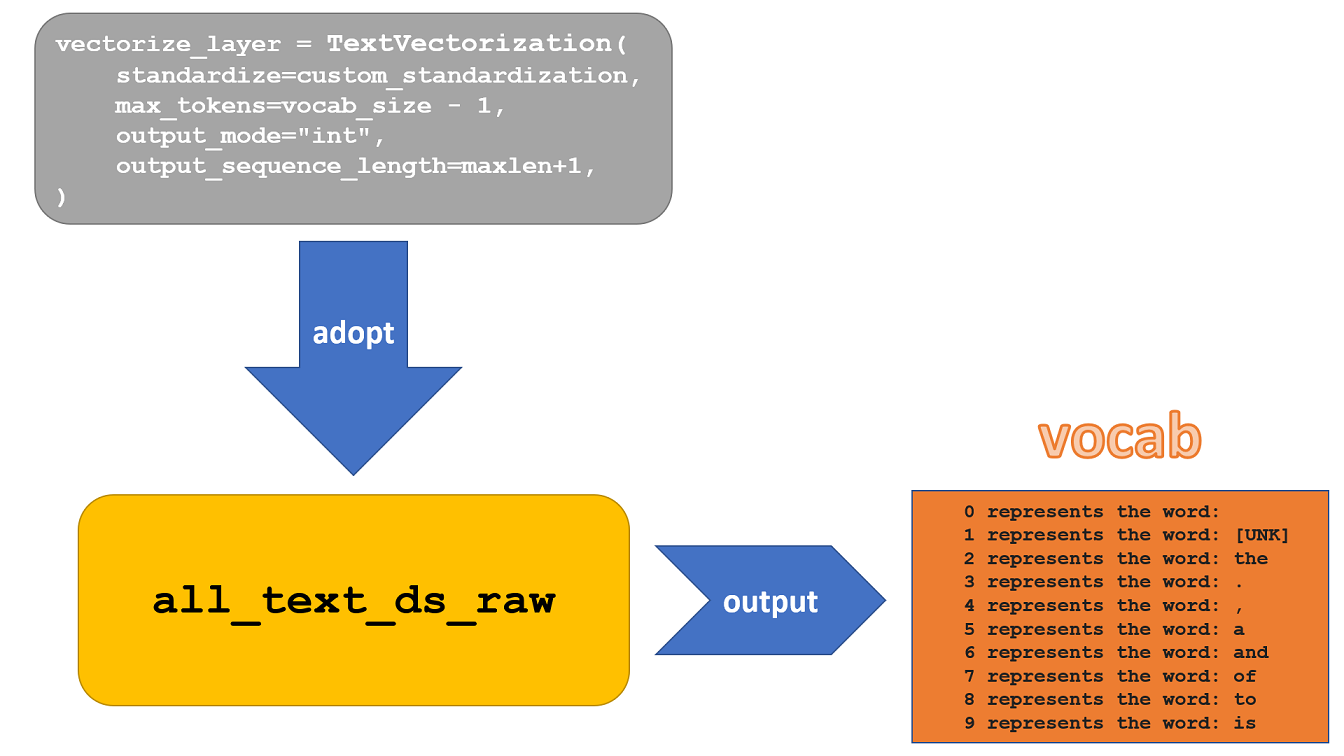

In [ ]:
def custom_standardization(input_string):
    """ Remove html line-break tags and handle punctuation """
    lowercased = tf.strings.lower(input_string)
    stripped_html = tf.strings.regex_replace(lowercased, "<br />", " ")
    return tf.strings.regex_replace(stripped_html, f"([{string.punctuation}])", r" \1")

# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size - 1,
    output_mode="int",
    output_sequence_length=maxlen+,
)
vectorize_layer.adapt(all_text_ds_raw)
vocab = vectorize_layer.get_vocabulary()  # To get words back from token indices

Notice that:
* `vocab` has the `vocab_size - 1` entries
* we can easily transform an integer to the corresponding word by using the `vocab` list
* we are ready to transform raw data (text) to a vector of integers

In [ ]:
print("vocab has the ", len(vocab)," entries")
print("vocab has the following first 10 entries")
for word in range(10):
  print(word, " represents the word: ", vocab[word])

for X in all_text_ds_raw.take(1):
  print(" Given raw data (text): ", X[0].numpy() )
  print(" Tokenized and Transformed to a vector of integers: ", vectorize_layer(tf.expand_dims(X[0], -1)))

vocab has the  19999  entries
vocab has the following first 10 entries
0  represents the word:  
1  represents the word:  [UNK]
2  represents the word:  the
3  represents the word:  .
4  represents the word:  ,
5  represents the word:  a
6  represents the word:  and
7  represents the word:  of
8  represents the word:  to
9  represents the word:  is
 Given raw data (text):  b'Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV\'s "Flamingo Road") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina\'s pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Bever

## 2.E Define a function to apply the adapted Keras TextVectoraziton Layer to create the train dataset 

`text_pos_ds_raw` & `text_neg_ds_raw`

We will do 3 important transformations here:
* First, convert word tokens to integer representation
* Second, create Output sequence from the input sequence by shifting the input by one
* Third, we will specify the polarity of the sentiment of the review

Thus, after mapping the function, we will have a train set consist of  tripples such that:
* X: input1 (a review)
* s: input2 (the sentiment value of the review: 1 Positive / 0 Negative)
* y: output (the review shifted left by one token) 

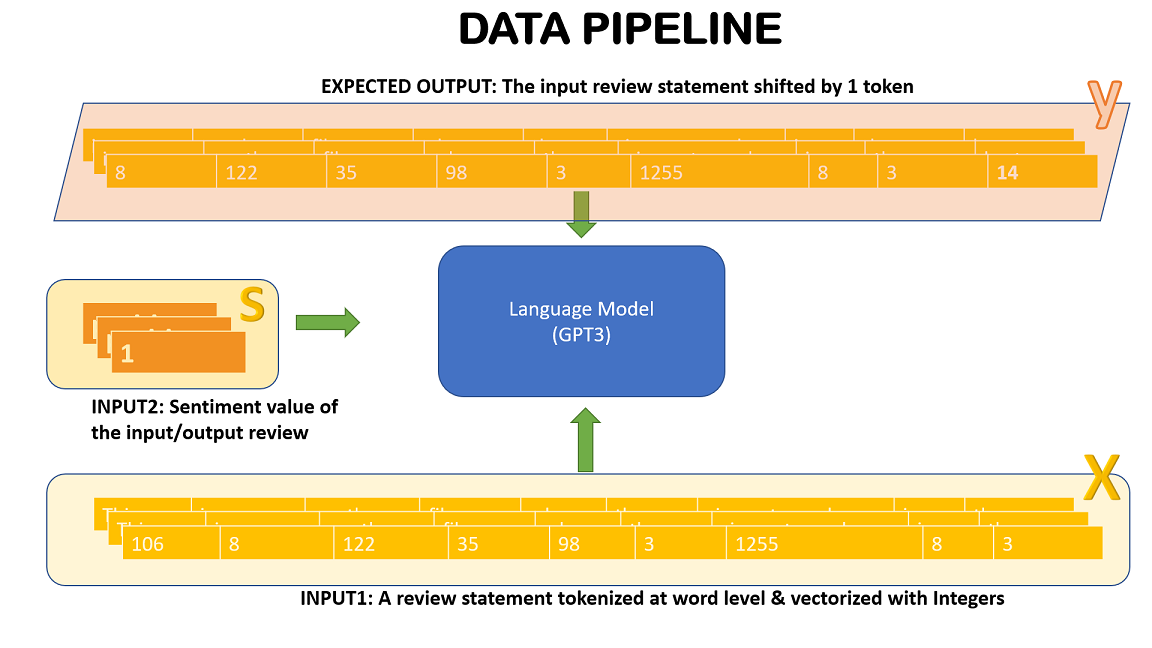

Below, we first apply this transformation to `text_pos_ds_raw` dataset:

In [ ]:
def prepare_pos_lm_inputs_labels(text):
    """
    Shift word sequences by 1 position so that the target for position (i) is
    word at position (i+1). The model will use all words up till position (i)
    to predict the next word.
    """
    text = tf.expand_dims(text, -1)
    tokenized_sentences = vectorize_layer(text)
    
    x = tf.squeeze(tokenized_sentences[:, :-1])
    s = 1
    y = tf.squeeze(tokenized_sentences[:, 1:])
    return (x,s), y

Let's apply the `prepare_lm_inputs_labels()` function to `text_pos_ds_raw` dataset

In [ ]:
text_pos_ds = text_pos_ds_raw.map(prepare_pos_lm_inputs_labels)

**Observe that:**
* After transformation, we have `text_pos_ds` dataset which includes X and y sequences.
* Both sequences are made up from integers (instead words!).
* Both X and y sequences have the same max length (80 here).
* y values are the values from X sequence only shifted to the right by one token.
* We can easily convert these integer values to the corresponding word tokens by using the Keras TextVectorization dictionary (vocab).
* You can observe the relationship between X and y sequences below.

In [ ]:
for (X,s),y in text_pos_ds.take(1):
  print("X.shape: ",X.shape,"s.shape: ", s.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("s :",s)
  print("y: ",y)
  input1 = " ".join([vocab[_] for _ in X])
  input2= s.numpy()
  output = " ".join([vocab[_] for _ in y])
  print("input1 (in text): " , input1)
  print("input2 : " , input2)
  print("output (in text): " , output)


X.shape:  (80,) s.shape:  () y.shape:  (80,)
X:  tf.Tensor(
[ 1161   202    18  1156    19   827  1462    21  2654    39 13746  7999
 12604     7   252    15     1  1252    27    23    17     5   193    21
   682  8667  2291    19     5     1  1888    41     9 19547     8   971
    20    48  3188 18495    39     1     2 18253     8   607    35     2
   146    19  7999 10637    29    61    79  1843     4     2  1246   215
     9   425     4  9645     1     9  1322    17 13746    15  5163     4
    21    60  7999  1123    92     5   988  5328], shape=(80,), dtype=int64)
s : tf.Tensor(1, shape=(), dtype=int32)
y:  tf.Tensor(
[  202    18  1156    19   827  1462    21  2654    39 13746  7999 12604
     7   252    15     1  1252    27    23    17     5   193    21   682
  8667  2291    19     5     1  1888    41     9 19547     8   971    20
    48  3188 18495    39     1     2 18253     8   607    35     2   146
    19  7999 10637    29    61    79  1843     4     2  1246   215     9
   42

Now, we apply the same transformation to `text_neg_ds_raw` dataset:

In [ ]:
def prepare_neg_lm_inputs_labels(text):
    """
    Shift word sequences by 1 position so that the target for position (i) is
    word at position (i+1). The model will use all words up till position (i)
    to predict the next word.
    """
    text = tf.expand_dims(text, -1)
    tokenized_sentences = vectorize_layer(text)
    
    x = tf.squeeze(tokenized_sentences[:, :-1])
    #s = batch_size * [0]
    s = 0
    y = tf.squeeze(tokenized_sentences[:, 1:])
    return (x,s), y

In [ ]:
text_neg_ds = text_neg_ds_raw.map(prepare_neg_lm_inputs_labels)

In [ ]:
for (X,s),y in text_neg_ds.take(1):
  print("X.shape: ",X.shape,"s.shape: ", s.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("s :",s)
  print("y: ",y)
  input1 = " ".join([vocab[_] for _ in X])
  input2= s.numpy()
  output = " ".join([vocab[_] for _ in y])
  print("input1 (in text): " , input1)
  print("input2 : " , input2)
  print("output (in text): " , output)

X.shape:  (80,) s.shape:  () y.shape:  (80,)
X:  tf.Tensor(
[    2   347  8189     4   184   398   303    15   189   125    98     2
  5038    96     1   463     2  1891     3    10    36   543     7    19
     5   690   430     4    11    75     2  5038  2452    14    38    32
     5   214     8   440    17    79     4   147     2  1891  1060     5
  2534     9   150    38   210     6  1568    58    91   244    19    38
   191     3   302    40   230   852     4     2    71   226    70   680
    42   102    25    19     1    35    23 14394], shape=(80,), dtype=int64)
s : tf.Tensor(0, shape=(), dtype=int32)
y:  tf.Tensor(
[  347  8189     4   184   398   303    15   189   125    98     2  5038
    96     1   463     2  1891     3    10    36   543     7    19     5
   690   430     4    11    75     2  5038  2452    14    38    32     5
   214     8   440    17    79     4   147     2  1891  1060     5  2534
     9   150    38   210     6  1568    58    91   244    19    38   191
     

**Note that:**
* After applying transformation to `text_neg_ds-raw` & `text_pos_ds_raw` datasets, we have now two new datasets: `text_neg_ds` & `text_pos_ds`. 
* These datasets are tokenized and vectorized. 
* Their structures are designed to fit our Language Model training data expectations:
  * X
  * s
  * y



## 2.F. Now, we can put all together negative (`text_neg_ds`) and positive (`text_pos_ds`) reviews as a single dataset: `all_text_ds`

We will apply several transformations:
* **concatenate** `text_pos_ds` + `text_neg_ds`
* **shuffle** the concatenated `text_pos_ds` so that positive and negative samples are scattered throughout the batches 
* **batch** up the `text_pos_ds` dataset
* **improve** the performance by ***caching*** and ***prefetching***  the `text_pos_ds` dataset

In [ ]:
all_text_ds = text_pos_ds.concatenate(text_neg_ds)
all_text_ds=all_text_ds.shuffle(buffer_size=250000)
all_text_ds=all_text_ds.batch(batch_size=batch_size)
all_text_ds=all_text_ds.cache()
all_text_ds = all_text_ds.prefetch(tf.data.experimental.AUTOTUNE)


## 2.G. Let's check the content of the final train dataset `all_text_ds`

In [ ]:
for (X,s), y in all_text_ds.take(1):
  print(X.shape, s.shape, y.shape)
  print("All sentiment values in this batch: ", s)
  print("\nFirst sample in the batch:")
  print("\tX is: " ,X[0])
  print("\ts is: ", s[0])
  print("\ty is: ", y[0])
  input1 = " ".join([vocab[_] for _ in X[0]])
  input2= s[0].numpy()
  output = " ".join([vocab[_] for _ in y[0]])
  print("\tinput1 (in text): " , input1)
  print("\tinput2 : " , input2)
  print("\toutput (in text): " , output)

  print("\nSecond sample in the batch:")
  print("\tX is: " ,X[1])
  print("\ts is: ", s[1])
  print("\ty is: ", y[1])
  input1 = " ".join([vocab[_] for _ in X[1]])
  input2= s[1].numpy()
  output = " ".join([vocab[_] for _ in y[1]])
  print("\tinput1 (in text): " , input1)
  print("\tinput2 : " , input2)
  print("\toutput (in text): " , output)

(128, 80) (128,) (128, 80)
All sentiment values in this batch:  tf.Tensor(
[1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1
 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1], shape=(128,), dtype=int32)

First sample in the batch:
	X is:  tf.Tensor(
[   12   201     2   355    11     2    18    77    90     3    12   792
    19   355    11    14   630   551     4     6    12   201    72 12404
    77    61   830     3    12   126    32     5   459    19     2  2965
     8     2  2061   523   103    39     2   592  1752   180     3    12
   164    26   112     2   927    16  1739     6   169  1084 12342    66
   657     7     2    18     3    12   112  2787     1     9    63     6
   576   371     3    12    64    44     8    73], shape=(80,), dtype=int64)
	s is:  tf.Tensor(1, shape=(), dtype=int32)
	y is:  tf.Tensor(
[  201     

As you see above, for 2 samples from a batch, we are ensure that:
* we have 3 tensors in each sample: X, s, and y as we planned to have
* X and y are the tokenized and vectorized versions of a review
* X and y are fixed size (80 tokens) tensors
* s is the sentiment value 1: Positive, 0: Negative
* X and y can be easily converted to text by using the `vocab` list from the Keras TextVectorization layer


## Implement a Keras callback for generating text

In [ ]:
def top_k_sample(logits, k=10):
    logits, indices = tf.math.top_k(logits, k=k, sorted=True)
    indices = np.asarray(indices).astype("int32")
    preds = keras.activations.softmax(tf.expand_dims(logits, 0))[0]
    preds = np.asarray(preds).astype("float32")
    return np.random.choice(indices, p=preds)

def TextGenerator(model, max_tokens=40, start_prompt = "this movie is", sentiment= 1, index_to_word=vocab, top_k=10):
    """A callback to generate text from a trained model.
    1. Feed some starting prompt to the model
    2. Predict probabilities for the next token
    3. Sample the next token and add it to the next input

    Arguments:
        max_tokens: Integer, the number of tokens to be generated after prompt.
        start_tokens: List of integers, the token indices for the starting prompt.
        index_to_word: List of strings, obtained from the TextVectorization layer.
        top_k: Integer, sample from the `top_k` token predictions.
        print_every: Integer, print after this many epochs.
    """
    def detokenize(number):
        return index_to_word[number]
    # Tokenize starting prompt
    word_to_index = {}
    for index, word in enumerate(vocab):
        word_to_index[word] = index

    
    start_tokens = [word_to_index.get(_, 1) for _ in start_prompt.split()]
    start_tokens = [_ for _ in start_tokens]

    num_tokens_generated = 0
    tokens_generated = []
    while num_tokens_generated <= max_tokens:
        pad_len = maxlen - len(start_tokens)
        sample_index = len(start_tokens) - 1
        if pad_len < 0:
            x = start_tokens[:maxlen]
            sample_index = maxlen - 1
        elif pad_len > 0:
            x = start_tokens + [0] * pad_len
        else:
            x = start_tokens
        s= sentiment
        x = np.array([x])
        s = np.array([s])

        y, _ = model.predict((x,s))
        sample_token = top_k_sample(y[0][sample_index])
        tokens_generated.append(sample_token)
        start_tokens.append(sample_token)
        num_tokens_generated = len(tokens_generated)
    txt = " ".join(
        [detokenize(_) for _ in start_tokens + tokens_generated]
    )
    print(f"generated text:\n{txt}\n")


## Train the model

Note: This code should preferably be run on GPU.

In [ ]:
my_model.fit(all_text_ds, verbose=1, epochs=3)

Epoch 1/3
391/391 [==============================] - 102s 199ms/step - loss: 6.2991 - dense_5_loss: 6.2991
Epoch 2/3
391/391 [==============================] - 79s 202ms/step - loss: 4.7942 - dense_5_loss: 4.7942
Epoch 3/3
391/391 [==============================] - 79s 203ms/step - loss: 4.5057 - dense_5_loss: 4.5057


In [ ]:
TextGenerator(my_model, start_prompt = "this movie is", sentiment=0)

generated text:
this movie is not one of the greatest horror films ever to have made a look at the top 250 list . the most boring film i have ever seen in it . this film has some interesting elements , and the plot points not one of the greatest horror films ever to have made a look at the top 250 list . the most boring film i have ever seen in it . this film has some interesting elements , and the plot points

